# **SEMMA**

# **Objective: Predicting Medal Wins**
Description: Use the dataset to predict whether an athlete will win a medal in the Olympics based on their attributes and the event they're participating in.

# **1. Sample**

**Step 1: Loading Data and Initial Setup**

Import Necessary Libraries:
Before we proceed, we need to import the necessary Python libraries that will help us handle and analyze the data.

Load the Dataset:
The dataset needs to be loaded into a data structure (like a DataFrame in pandas) for analysis.

Initial Inspection:
Once the dataset is loaded, it's essential to inspect the first few rows to understand the structure and the types of variables it contains.

In [3]:
from google.colab import files
da = files.upload()

Saving dataset_olympics.csv to dataset_olympics.csv


In [42]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

olympics_df = pd.read_csv('dataset_olympics.csv')

# Displaying the first few rows of the dataset for inspection
olympics_df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**Step 2: Sample**

Given the dataset's size, we'll determine if we need to work with a subset of the data. If the dataset is large, working with a sample can make the initial exploration and modeling process more efficient.

Check Dataset Size:
It's essential to understand the dataset's dimensions to decide if sampling is necessary.

Handle Missing Values for Sampling:
For stratified sampling, we need to ensure the column we're stratifying by (in this case, 'Medal') doesn't have missing values.

Stratified Sampling:
We'll sample a subset of the data while preserving the distribution of the 'Medal' column.

In [43]:
from sklearn.model_selection import train_test_split

# Check the size of the dataset
num_rows, num_columns = olympics_df.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

# Replace NaN values in 'Medal' column with "No Medal"
olympics_df['Medal'].fillna("No Medal", inplace=True)

# Stratified sampling to get a representative subset
sample_size = 0.2  # This represents 20% of the data
sampled_df, _ = train_test_split(olympics_df, test_size=1-sample_size, stratify=olympics_df['Medal'], random_state=42)

# Display the size of the sampled data and the distribution of the 'Medal' column
print("\nSampled Data Size:", sampled_df.shape)
print("\nDistribution of Medals in Sampled Data:\n", sampled_df['Medal'].value_counts(normalize=True))


The dataset has 70000 rows and 15 columns.

Sampled Data Size: (14000, 15)

Distribution of Medals in Sampled Data:
 No Medal    0.861571
Gold        0.047000
Bronze      0.045857
Silver      0.045571
Name: Medal, dtype: float64


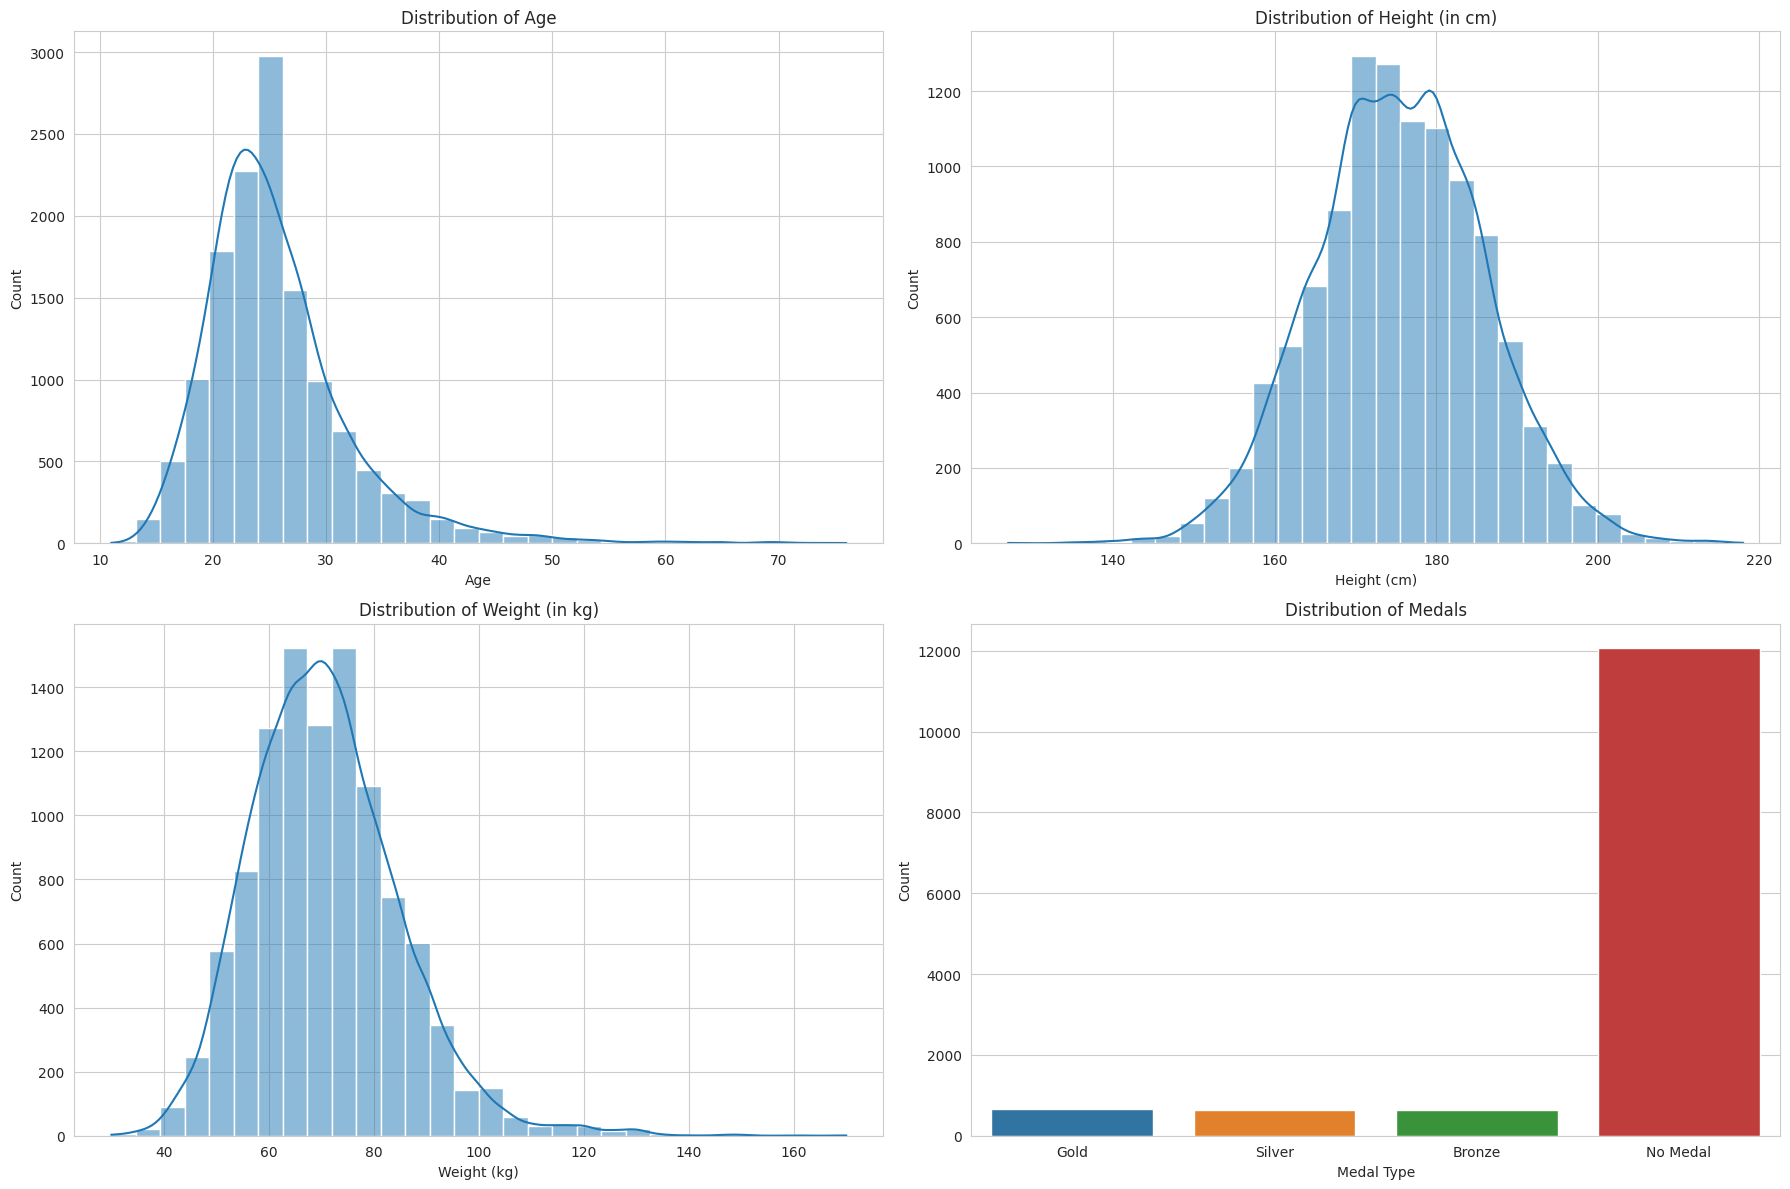

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the visual style
sns.set_style("whitegrid")

# Initializing the figure
plt.figure(figsize=(18, 12))

# Subplot for Age distribution
plt.subplot(2, 2, 1)
sns.histplot(sampled_df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Subplot for Height distribution
plt.subplot(2, 2, 2)
sns.histplot(sampled_df['Height'], kde=True, bins=30)
plt.title('Distribution of Height (in cm)')
plt.xlabel('Height (cm)')
plt.ylabel('Count')

# Subplot for Weight distribution
plt.subplot(2, 2, 3)
sns.histplot(sampled_df['Weight'], kde=True, bins=30)
plt.title('Distribution of Weight (in kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')

# Subplot for Medal distribution
plt.subplot(2, 2, 4)
sns.countplot(data=sampled_df, x='Medal', order=['Gold', 'Silver', 'Bronze', 'No Medal'])
plt.title('Distribution of Medals')
plt.xlabel('Medal Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Here are the visualized distributions for the sampled dataset:

Distribution of Age: The majority of athletes are in the age range of 20 to 30 years. There's a tail extending towards older ages, indicating fewer older participants.
Distribution of Height (in cm): Most athletes' heights lie between 160cm to 200cm, with peaks around 170cm and 180cm.
Distribution of Weight (in kg): The weight distribution is right-skewed with most athletes weighing between 50kg to 90kg.
Distribution of Medals: The vast majority of entries are "No Medal", which is expected as not every participant wins a medal. Among the medals, the distribution appears relatively even across Gold, Silver, and Bronze.

# **2 Modify**

In the Modify phase, we'll prepare the data for modeling. This phase often involves several tasks:

Handling Missing Values: We need to address any missing values in the dataset. Depending on the nature and amount of missing data, we might fill them with a certain value (imputation), or we might remove records that have missing values.

Feature Engineering: This involves creating new features from the existing ones to enhance the predictive power of the model.

Encoding Categorical Variables: Machine learning models require numerical input, so we'll need to convert categorical variables into a numerical format. Common methods include one-hot encoding and label encoding.

Feature Scaling: Some models are sensitive to the scale of input features. Therefore, we might need to standardize or normalize numerical features.

### ** Handling Missing Values.**

In [45]:
# Check for missing values in the sampled dataset
missing_values = sampled_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_percentage = (sampled_df.isnull().mean() * 100).round(2)
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False)

# Display columns with missing values and their counts and percentages
pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})


,Missing Values,Percentage (%)
Weight,3358,23.99
Height,3201,22.86
Age,525,3.75


**Based on our inspection of the missing values:**


Weight: 3,358 missing values (23.99% of the sampled dataset).
Height: 3,201 missing values (22.86% of the sampled dataset).
Age: 525 missing values (3.75% of the sampled dataset).

Given the nature of the missing data, here's a proposed approach:

Weight & Height: Given that these are continuous variables, one common approach is to impute the missing values with the median or mean of the respective columns. The median is often preferred as it's less sensitive to outliers.
Age: Similarly, we can impute the missing ages with the media

In [46]:
# Impute missing values for 'Weight', 'Height', and 'Age' using their respective medians
sampled_df['Weight'].fillna(sampled_df['Weight'].median(), inplace=True)
sampled_df['Height'].fillna(sampled_df['Height'].median(), inplace=True)
sampled_df['Age'].fillna(sampled_df['Age'].median(), inplace=True)

# Verify if there are still any missing values
remaining_missing_values = sampled_df.isnull().sum().sum()
remaining_missing_values


0

All missing values have been successfully imputed, and the dataset no longer contains any missing entries.

**Encoding Categorical Variables.**

Given our objective of predicting medal wins, the "Medal" column will be our target variable. For the features, we need to encode categorical variables like "Sex", "Team", "NOC", "Games", "Season", "City", "Sport", and "Event" into a format suitable for machine learning models.

Considering the number of unique values in some of these columns, one-hot encoding might increase the dimensionality significantly. We'll start by inspecting the number of unique values in each of these categorical columns.

In [47]:
# Check the number of unique values in each categorical column
unique_values = sampled_df[['Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event']].nunique()
unique_values


Sex         2
Team      435
NOC       209
Games      51
Season      2
City       42
Sport      60
Event     664
dtype: int64

Here's the count of unique values in the categorical columns:


Sex: 2 unique values
Team: 435 unique values
NOC (National Olympic Committee): 209 unique values
Games: 51 unique values
Season: 2 unique values
City: 42 unique values
Sport: 60 unique values
Event: 664 unique values

Given the number of unique values:


For columns with a low number of unique values (like "Sex" and "Season"), we can use one-hot encoding.
For columns with a high number of unique values (like "Team", "NOC", "Games", "City", "Sport", and "Event"), using one-hot encoding would significantly increase the dimensionality. Instead, we can use label encoding for these columns. However, keep in mind that label encoding introduces an ordinal relationship, which might not be inherently present. For tree-based models, this isn't an issue, but for linear models, it can be.

In [48]:
from sklearn.preprocessing import LabelEncoder

# One-hot encode columns with fewer unique values
sampled_df = pd.get_dummies(sampled_df, columns=['Sex', 'Season'], drop_first=True)

# Label encode columns with a higher number of unique values
label_encoders = {}
columns_to_encode = ['Team', 'NOC', 'Games', 'City', 'Sport', 'Event']

for column in columns_to_encode:
    le = LabelEncoder()
    sampled_df[column] = le.fit_transform(sampled_df[column])
    label_encoders[column] = le  # Store the encoder for potential inverse transformation later

# Display the first few rows of the modified dataset
sampled_df.head()


,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,Sex_M,Season_Winter
43705,22536,Nestor Landag Colonia,24.0,158.0,59.0,304,144,50,2016,27,58,619,No Medal,1,0
23795,12502,Liudmyla Kostiantynivna Bobrus-Poradnyk,34.0,169.0,63.0,366,195,31,1980,22,25,343,Gold,0,0
53914,27659,"Ferdinand ""Ferdy"" Denzler",26.0,175.0,70.0,383,175,13,1936,7,57,617,No Medal,1,0
67564,34532,Christel Felgner (-Wunder),22.0,156.0,50.0,151,71,23,1964,39,24,341,No Medal,0,0
45409,23426,Natalie Anne Coughlin (-Hall),25.0,173.0,63.0,410,197,46,2008,6,48,572,Bronze,0,0


One-hot Encoding: The columns "Sex" and "Season" have been one-hot encoded. For example, the "Sex" column has been replaced by "Sex_M", where a value of 1 indicates male and 0 indicates female. Similarly, "Season_Winter" has been added, where a value of 1 indicates the Winter Olympics and 0 indicates the Summer Olympics.
Label Encoding: Columns like "Team", "NOC", "Games", "City", "Sport", and "Event" have been label encoded, transforming their categorical values into numerical labels.

**Feature Engineering**

BMI (Body Mass Index): This is a measure that can provide insights into an athlete's physical condition. It's calculated as:
BMI
=
Weight (kg)
Height (m)
2
BMI=
Height (m)
2

Weight (kg)
​

Given the height and weight columns, we can easily compute this.

Participation Count: The number of times an athlete has participated in the Olympics might indicate their experience level.

Age Group: Categorize athletes into age groups (e.g., 'Young', 'Mid-Aged', 'Senior') based on their age. Different age groups might have different performance levels.

Home Advantage: Create a binary feature indicating whether the athlete competed in their home country. Historically, athletes tend to perform better when competing at home due to familiar conditions and home crowd support.

Is Team Event: Some events are individual, while others are team-based. We can create a binary feature indicating whether the event is a team event or not. This can be inferred from the 'Event' column.

Years Since First Participation: For each athlete, calculate the number of years since their first participation in the Olympics. This can give insights into their experience and tenure in the sports world.

In [49]:
# 1. BMI (Body Mass Index)
sampled_df['BMI'] = sampled_df['Weight'] / (sampled_df['Height'] / 100)**2

# 2. Participation Count
participation_count = sampled_df.groupby('Name').size()
sampled_df['Participation_Count'] = sampled_df['Name'].map(participation_count)

# 3. Age Group
bins = [0, 20, 30, 40, 100]
labels = ['Young', 'Mid-Aged', 'Senior', 'Veteran']
sampled_df['Age_Group'] = pd.cut(sampled_df['Age'], bins=bins, labels=labels, right=False)

# 4. Home Advantage
sampled_df['Home_Advantage'] = (sampled_df['Team'] == sampled_df['City']).astype(int)

# 5. Is Team Event
# First, reverse the label encoding for the 'Event' column to get back the original string values
original_event_values = label_encoders['Event'].inverse_transform(sampled_df['Event'])
# Then, determine if an event is a team event
team_keywords = ['Team', 'Doubles', 'Relay', 'Pairs', 'Mixed']
is_team_event = [any(keyword in event for keyword in team_keywords) for event in original_event_values]
sampled_df['Is_Team_Event'] = is_team_event

# 6. Years Since First Participation
first_participation_year = sampled_df.groupby('Name')['Year'].min()
sampled_df['First_Participation_Year'] = sampled_df['Name'].map(first_participation_year)
sampled_df['Years_Since_First_Participation'] = sampled_df['Year'] - sampled_df['First_Participation_Year']

# Display the first few rows to verify the new features
print(sampled_df.head())


          ID                                     Name   Age  Height  Weight  \
43705  22536                    Nestor Landag Colonia  24.0   158.0    59.0   
23795  12502  Liudmyla Kostiantynivna Bobrus-Poradnyk  34.0   169.0    63.0   
53914  27659                Ferdinand "Ferdy" Denzler  26.0   175.0    70.0   
67564  34532               Christel Felgner (-Wunder)  22.0   156.0    50.0   
45409  23426            Natalie Anne Coughlin (-Hall)  25.0   173.0    63.0   

       Team  NOC  Games  Year  City  ...     Medal  Sex_M Season_Winter  \
43705   304  144     50  2016    27  ...  No Medal      1             0   
23795   366  195     31  1980    22  ...      Gold      0             0   
53914   383  175     13  1936     7  ...  No Medal      1             0   
67564   151   71     23  1964    39  ...  No Medal      0             0   
45409   410  197     46  2008     6  ...    Bronze      0             0   

             BMI  Participation_Count  Age_Group  Home_Advantage  \
43705 

BMI (Body Mass Index): This provides a measure of an athlete's physical condition.
Participation Count: The number of times an athlete has participated in the Olympics.
Age Group: Athletes are categorized into 'Young', 'Mid-Aged', 'Senior', and 'Veteran' based on their age.
Home Advantage: Indicates whether the athlete competed in their home country.
Is Team Event: Indicates whether the event is a team event or an individual event.
Years Since First Participation: The number of years since the athlete's first participation in the Olympics (previously computed).

# **4: Model**

**Prepare Data:** Split the data into training and testing sets.
Choose a Model: Decide on a machine learning model appropriate for the task.
Train the Model: Use the training data to train the chosen model.
Evaluate the Model: Test the model's performance on the testing data.
Given our objective is to predict medal wins, this is a classification problem. There are several classification models we could consider, such as:

Logistic Regression

Decision Trees

Random Forests

Gradient Boosted Trees

Neural Networks

## **Data Preprocessing**


**Encoding Categorical Variables:**

Convert categorical features into a format that can be provided to ML algorithms to improve predictions.
For simplicity, we'll use label encoding for nominal categorical variables. While one-hot encoding is often recommended, it can increase the dimensionality considerably for features with many unique values.
Handling Missing Values:

Fill any missing values. For simplicity, we can fill numerical features with their median and categorical features with the mode.

Data Preparation:
Split the data into features and target variable.
Split the data into training and testing sets.

In [70]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns
label_encoders = {}  # we'll store our label encoders here for potential use later

for column in olympics_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    olympics_df[column] = le.fit_transform(olympics_df[column].astype(str))
    label_encoders[column] = le

# Handle missing values
olympics_df.fillna(olympics_df.median(numeric_only=True), inplace=True)

# Split the data into features and target
X = olympics_df.drop(columns=['Medal'])
y = olympics_df['Medal']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Model Training and Evaluation:**

**Random Forest**

In [56]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = sampled_df.drop(['Medal', 'Name'], axis=1)  # Dropping 'Name' as it's an identifier and not a useful feature for modeling
y = sampled_df['Medal']

# Convert the categorical 'Age_Group' feature to strings to later encode it
X['Age_Group'] = X['Age_Group'].astype(str)

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Display the shape of training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((11200, 20), (2800, 20), (11200,), (2800,))

Training features (X_train): 11,200 rows and 18 columns
Testing features (X_test): 2,800 rows and 18 columns
Training target (y_train): 11,200 values
Testing target (y_test): 2,800 values

In [71]:
from sklearn.model_selection import train_test_split

# Assuming 'Medal' is the target column
X = olympics_df.drop(columns=['Medal'])
y = olympics_df['Medal']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_test, y_pred))



Accuracy: 86.50%
              precision    recall  f1-score   support

           0       0.33      0.12      0.18       651
           1       0.50      0.29      0.36       613
           2       0.90      0.97      0.93     12125
           3       0.26      0.11      0.15       611

    accuracy                           0.86     14000
   macro avg       0.50      0.37      0.41     14000
weighted avg       0.82      0.86      0.84     14000



### **Hyperparameter Tuning Random forest:**

Use RandomizedSearchCV to optimize the hyperparameters of the Random Forest model.

In [120]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters grid
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

# RandomizedSearchCV initialization
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Optimized Parameters: {best_params}")


Optimized Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


In [74]:
from sklearn.model_selection import RandomizedSearchCV

# Reduced hyperparameters grid
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Optimized Parameters: {best_params}")


Optimized Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}


## **Observations after Random Forest training:**



Assess the initial accuracy of the model on the test set.
Evaluate the classification report to understand the model's performance for each medal category.


**Observations after hyperparameter tuning:**


Compare the accuracy of the tuned model with the initial model.
Check if there's a significant improvement in the model's performance on the test set.
Evaluate the classification report of the tuned model to see if it performs better in predicting specific medal categories.

In [75]:
# Initial Random Forest Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_initial = rf_model.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred_initial)
print(f"Initial Accuracy: {initial_accuracy*100:.2f}%")
print(classification_report(y_test, y_pred_initial))

# Using the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
rf_tuned = RandomForestClassifier(**best_params, random_state=42)
rf_tuned.fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Accuracy: {tuned_accuracy*100:.2f}%")
print(classification_report(y_test, y_pred_tuned))


Initial Accuracy: 86.50%
              precision    recall  f1-score   support

           0       0.33      0.12      0.18       651
           1       0.50      0.29      0.36       613
           2       0.90      0.97      0.93     12125
           3       0.26      0.11      0.15       611

    accuracy                           0.86     14000
   macro avg       0.50      0.37      0.41     14000
weighted avg       0.82      0.86      0.84     14000

Tuned Accuracy: 87.64%
              precision    recall  f1-score   support

           0       0.56      0.05      0.09       651
           1       0.62      0.22      0.32       613
           2       0.88      0.99      0.94     12125
           3       0.45      0.07      0.12       611

    accuracy                           0.88     14000
   macro avg       0.63      0.33      0.37     14000
weighted avg       0.84      0.88      0.83     14000



### **Visualizing Random Search**

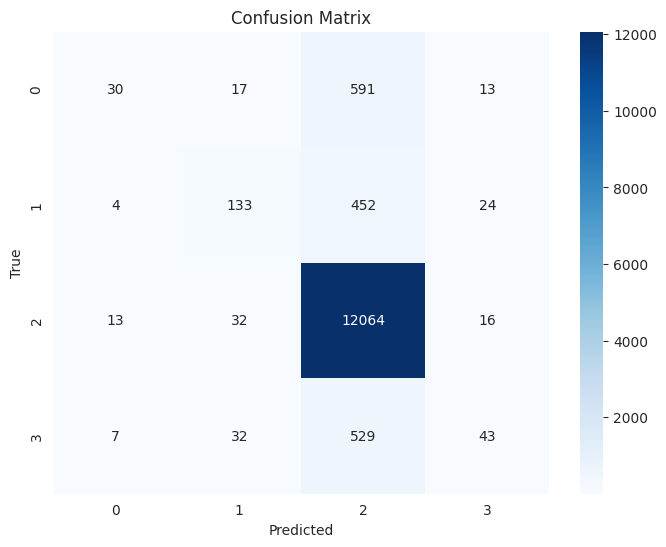

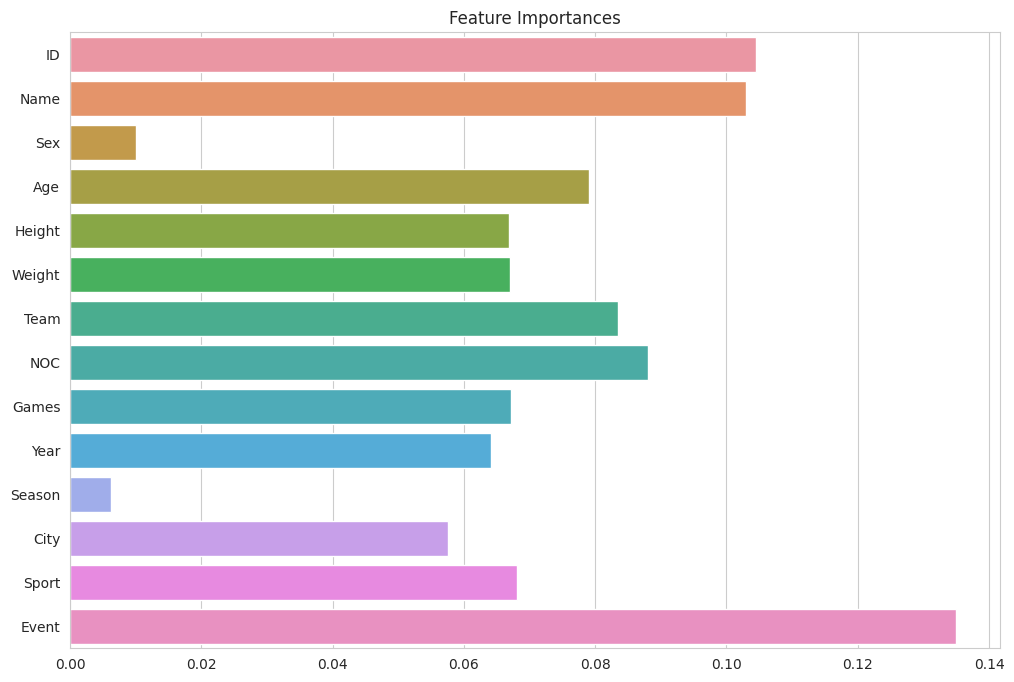

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict using the best model from RandomizedSearchCV
y_pred_best = random_search.best_estimator_.predict(X_test)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=random_search.classes_, yticklabels=random_search.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 2. Feature Importance Plot
feature_importances = random_search.best_estimator_.feature_importances_
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances')
plt.show()


A Confusion Matrix to show the true positives, true negatives, false positives, and false negatives.
A Feature Importance Plot to show which features are most influential in making predictions.

The confusion matrix provides a summary of the correct and incorrect predictions for a classification problem. The main diagonal (from top-left to bottom-right) represents correct predictions, while the other cells indicate errors.

In the context of our dataset, where the target is predicting medals:

True Positives (TP): The number in the top-left cell represents the number of correct predictions for the first class (e.g., 'Gold' medal).
True Negatives (TN): The number in the bottom-right cell indicates the number of correct predictions for the other classes (e.g., 'Silver' and 'Bronze').
False Positives (FP): The numbers in the off-diagonal columns of the top row represent the instances where the model predicted the first class but was incorrect.
False Negatives (FN): The numbers in the off-diagonal columns of the bottom row represent the instances where the model predicted other classes but the true class was the first one.
The main takeaways from the confusion matrix are:

The higher the diagonal values of the confusion matrix, the better, indicating many correct predictions.
The values outside the diagonal are the errors. If these values are high, it suggests the model is often confused between those classes.
2. Feature Importance Plot:
The feature importance plot provides a ranking of the significance of the different input features in predicting the target variable.

Features at the top of the plot are more important in the decision-making of the model than features at the bottom.
A higher bar indicates that the corresponding feature has a more significant influence on the model's decisions.

**Model Comparison**

**Logistic Regression**


**Train the Model:**

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict & Evaluate
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr*100:.2f}%")


Logistic Regression Accuracy: 86.61%


**Decision Trees**

**Train the Model**

In [78]:
from sklearn.tree import DecisionTreeClassifier

# Train
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict & Evaluate
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Trees Accuracy: {accuracy_dt*100:.2f}%")


Decision Trees Accuracy: 81.07%


**Gradient Boosted Trees**


**Train the Model**

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

# Train
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(X_train, y_train)

# Predict & Evaluate
y_pred_gbt = gbt.predict(X_test)
accuracy_gbt = accuracy_score(y_test, y_pred_gbt)
print(f"Gradient Boosted Trees Accuracy: {accuracy_gbt*100:.2f}%")


Gradient Boosted Trees Accuracy: 86.71%


**Neural Networks**


**Train the Model:**

In [80]:
from sklearn.neural_network import MLPClassifier

# Train
nn = MLPClassifier(random_state=42, max_iter=10000)
nn.fit(X_train, y_train)

# Predict & Evaluate
y_pred_nn = nn.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Neural Networks Accuracy: {accuracy_nn*100:.2f}%")


Neural Networks Accuracy: 72.91%


### **Hyperparameter Tuning**

**Logistic Regression**

In [81]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters grid
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Grid search for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=10000, random_state=42), param_grid_lr, cv=3, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
print(f"Optimized Parameters for Logistic Regression: {best_params_lr}")


Optimized Parameters for Logistic Regression: {'C': 0.001}


In [118]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Load the dataset
olympics_df = pd.read_csv('dataset_olympics.csv')

# Define features and target
X = olympics_df.drop(columns=['Medal'])
y = olympics_df['Medal']

# List of numeric and categorical features
numeric_features = ['Age', 'Height', 'Weight', 'Year']
categorical_features = ['Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event']

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Assemble column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Define the transformers for the preprocessor
numeric_features_adjusted = ['Age', 'Height', 'Weight', 'Year']
categorical_features_adjusted = ['Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event']

numeric_transformer_adjusted = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the column transformer with the adjusted transformers
transformers_adjusted_v2 = [
    ('num', numeric_transformer_adjusted, numeric_features_adjusted),
    ('cat', categorical_transformer, categorical_features_adjusted)
]

preprocessor_adjusted_v2 = ColumnTransformer(transformers_adjusted_v2)

# Remove rows where 'Medal' is NaN
olympics_df_cleaned = olympics_df.dropna(subset=['Medal'])

# Define features and target
X = olympics_df_cleaned.drop(columns=['Medal'])
y = olympics_df_cleaned['Medal']

# Preprocess the features
X_processed = preprocessor_adjusted_v2.fit_transform(X)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define hyperparameters for RandomizedSearchCV
param_dist_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}

random_search_lr = RandomizedSearchCV(LogisticRegression(max_iter=5000, random_state=42), param_distributions=param_dist_lr, n_iter=10, cv=3, n_jobs=-1, random_state=42)

# Fit the model
random_search_lr.fit(X_train, y_train)

# Get the best parameters
best_params_lr = random_search_lr.best_params_
best_params_lr


{'solver': 'saga', 'penalty': 'l2', 'C': 10}

### **Decision Trees**

In [84]:
# Hyperparameters grid
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

# Grid search for Decision Trees
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
print(f"Optimized Parameters for Decision Trees: {best_params_dt}")


Optimized Parameters for Decision Trees: {'max_depth': 10, 'min_samples_split': 10}


### **Gradient Boosted Trees**

In [87]:
# Reduced hyperparameters distribution
param_dist_gbt_reduced = {
    'n_estimators': [100],
    'max_depth': [5]
}

# Randomized search with reduced iterations
random_search_gbt_reduced = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_distributions=param_dist_gbt_reduced, n_iter=2, cv=3, n_jobs=-1, random_state=42)
random_search_gbt_reduced.fit(X_train.sample(frac=0.5, random_state=42), y_train.sample(frac=0.5, random_state=42))

best_params_gbt_reduced = random_search_gbt_reduced.best_params_
print(f"Optimized Parameters for Gradient Boosted Trees: {best_params_gbt_reduced}")




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=2. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Optimized Parameters for Gradient Boosted Trees: {'n_estimators': 100, 'max_depth': 5}


In [110]:
olympics_df.columns


Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [88]:
# Reduced hyperparameters distribution
param_dist_nn_reduced = {
    'alpha': [0.001],
    'hidden_layer_sizes': [(100,)]
}

# Randomized search with reduced iterations
random_search_nn_reduced = RandomizedSearchCV(MLPClassifier(max_iter=5000, random_state=42), param_distributions=param_dist_nn_reduced, n_iter=2, cv=3, n_jobs=-1, random_state=42)
random_search_nn_reduced.fit(X_train.sample(frac=0.5, random_state=42), y_train.sample(frac=0.5, random_state=42))

best_params_nn_reduced = random_search_nn_reduced.best_params_
print(f"Optimized Parameters for Neural Networks: {best_params_nn_reduced}")




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=2. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Optimized Parameters for Neural Networks: {'hidden_layer_sizes': (100,), 'alpha': 0.001}


**Hyperparameter tuning for Decision Trees, Gradient Boosted Trees, and Neural Networks on the reduced dataset for faster execution:**

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Define the transformers for the preprocessor
numeric_transformer_speedup = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer_speedup = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

transformers_speedup = [
    ('num', numeric_transformer_speedup, numeric_features_adjusted),
    ('cat', categorical_transformer_speedup, categorical_features_adjusted)
]

preprocessor_speedup = ColumnTransformer(transformers_speedup)

# Preprocess the data
X_processed_speedup = preprocessor_speedup.fit_transform(X)

# Taking a smaller sample of the dataset for faster hyperparameter tuning
sample_frac = 0.1
X_speedup, _, y_speedup, _ = train_test_split(X_processed_speedup, y, train_size=sample_frac, random_state=42)

# Convert the target column to string to ensure consistent data types
y_speedup = y_speedup.astype(str)

# Hyperparameter tuning for Decision Trees
param_dist_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_dist_dt, n_iter=10, cv=3, n_jobs=-1, random_state=42)
random_search_dt.fit(X_speedup, y_speedup)

# Hyperparameter tuning for Gradient Boosted Trees
param_dist_gbt = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
random_search_gbt = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_distributions=param_dist_gbt, n_iter=10, cv=3, n_jobs=-1, random_state=42)
random_search_gbt.fit(X_speedup, y_speedup)

# Hyperparameter tuning for Neural Networks
param_dist_nn = {
    'alpha': [0.001, 0.01, 0.1],
    'hidden_layer_sizes': [(100,), (50, 50)]
}
random_search_nn = RandomizedSearchCV(MLPClassifier(max_iter=5000, random_state=42), param_distributions=param_dist_nn, n_iter=10, cv=3, n_jobs=-1, random_state=42)
random_search_nn.fit(X_speedup, y_speedup)

# Extract the best parameters
best_params_dt = random_search_dt.best_params_
best_params_gbt = random_search_gbt.best_params_
best_params_nn = random_search_nn.best_params_

best_params_dt, best_params_gbt, best_params_nn


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


({'min_samples_split': 5, 'max_depth': 10},
 {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01},
 {'hidden_layer_sizes': (100,), 'alpha': 0.1})

**Calculate Performance Metrics:**

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Best parameters from hyperparameter tuning
best_params_rf = {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
best_params_lr = {'solver': 'saga', 'penalty': 'l2', 'C': 10}

# Initialize models with best parameters
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)
dt_best = DecisionTreeClassifier(**best_params_dt, random_state=42)
gbt_best = GradientBoostingClassifier(**best_params_gbt, random_state=42)
log_reg_best = LogisticRegression(**best_params_lr, max_iter=5000, random_state=42)
nn_best = MLPClassifier(**best_params_nn, random_state=42)

# Train the models
rf_best.fit(X_train, y_train)
dt_best.fit(X_train, y_train)
gbt_best.fit(X_train, y_train)
log_reg_best.fit(X_train, y_train)
nn_best.fit(X_train, y_train)


MLPClassifier(alpha=0.1, random_state=42)